In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

<b><u>Kmeans++</u> : Q5. Cluster Initialization</b>

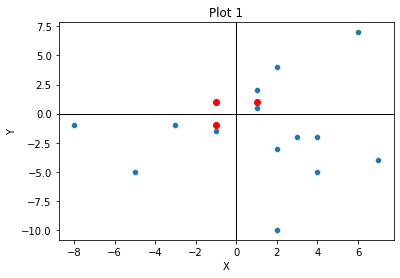

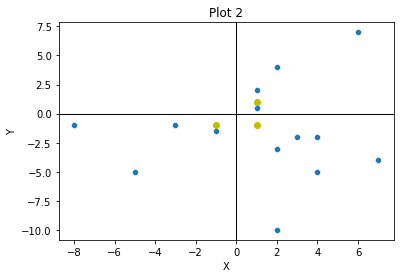

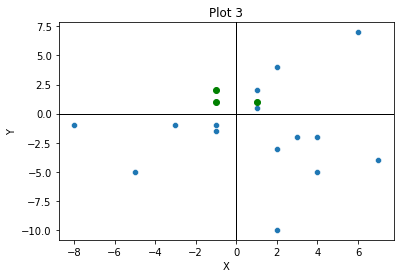

In [11]:
km = pd.read_csv(".\kmeans++.csv")

c1 = [(1, 1), (-1, -1), (-1, 1)]
c2 = [(1, 1), (-1, -1), (1, -1)]
c3 = [(1, 1), (-1, 1), (-1, 2)]

# Create a list containing all three coordinate lists
all_coordinates = [c1, c2, c3]

# Define colors for each plot
colors = ['r', 'y', 'g']

# Loop through each coordinate list and plot the points and quadrants
for i, coordinates in enumerate(all_coordinates):
    sns.scatterplot(x = km["X"], y = km["Y"])
    plt.scatter(x=[x for x, y in coordinates], y=[y for x, y in coordinates], color=colors[i])
    plt.axvline(0, color='black', linewidth=1)  
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f"Plot {i+1}")
    plt.show()

<b><u>Kmeans++</u> : Q6. Correct order</b>

In [17]:
pts = np.array([(1,2),(2,3),(-1,-2),(3,4),(4,-2),(3,-3),(-5,-4),(3,10),(-3,-4),(7,9),
       (6,5),(3,-4),(-4,-3),(-1,-5),(-5,-8),(6,7),(4,-5),(0,0),(-3,-5)])

centroid1 = (-3, -5)
centroid2 = (3, 4)
dist = []

for pt in pts:
    d1 = np.linalg.norm(pt - centroid1)
    d2 = np.linalg.norm(pt - centroid2)
    min_dist = min(d1, d2)
    dist.append((pt, min_dist))

dist = np.asarray(dist, dtype ="object")
sorted_index = np.argsort(dist[:, 1])[::-1]
dist = dist[sorted_index]
dist

array([[array([ 4, -5]), 7.0],
       [array([7, 9]), 6.4031242374328485],
       [array([ 3, -3]), 6.324555320336759],
       [array([ 4, -2]), 6.082762530298219],
       [array([ 3, -4]), 6.082762530298219],
       [array([ 3, 10]), 6.0],
       [array([0, 0]), 5.0],
       [array([6, 7]), 4.242640687119285],
       [array([-5, -8]), 3.605551275463989],
       [array([-1, -2]), 3.605551275463989],
       [array([6, 5]), 3.1622776601683795],
       [array([1, 2]), 2.8284271247461903],
       [array([-5, -4]), 2.23606797749979],
       [array([-4, -3]), 2.23606797749979],
       [array([-1, -5]), 2.0],
       [array([2, 3]), 1.4142135623730951],
       [array([-3, -4]), 1.0],
       [array([3, 4]), 0.0],
       [array([-3, -5]), 0.0]], dtype=object)

In [16]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([10, 7, 28, 20, 35]).reshape(-1, 1)

#average linkage
agg = AgglomerativeClustering(n_clusters = None, linkage = 'average', distance_threshold = 20).fit(X)
print(agg.labels_)

#ward linkage --> similar to manhattan distance
agg = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = 20).fit(X)
print(agg.labels_)

[0 0 0 0 0]
[0 0 1 0 1]


<b><u>DBSCAN:</u> Q1. Single Linkage Similarity</b>
<br>Actual question is about heirarchical clustering

In [30]:
c1 = np.array([(10,2),(4,15),(0,15),(3,12),(7,8),(4,8)])
c2 = np.array([(-1,-5),(-8,-10),(-10,-20),(-4,-20),(-1,-25)])

dist = []

for i in c1:
    for j in c2:
        dist.append(np.linalg.norm(i-j))

print(1/sorted(dist)[0])

0.07669649888473704


<b><u>ML: Gaussian Mixture Models:</u> Q6. Next centroid</b>

In [34]:
c = (1,1) 
X = np.array([(2,3), (1,4), (5,6), (-1,-1), (-1,4), (3,-5), (-9,7), (8,7), (1,-4), (5,-6), (-4,7)])

max_pt = None
max_dist = -1

for pt in X:
    dist = np.linalg.norm(pt - c)
    if(dist > max_dist):
        max_dist = dist
        max_pt = pt
        
print(max_pt)

[-9  7]


<b><u>ML: High Dimensional Viz - UMAP:</u> Q3. Which principal component? </b>

Link: https://medium.com/analytics-vidhya/the-math-of-principal-component-analysis-pca-bf7da48247fc
<br> https://towardsdatascience.com/principal-component-analysis-from-scratch-in-numpy-61843da1f967

In [55]:
from numpy.linalg import eig

x = np.asarray([[ 1, -1], [-1, 1], [2, 2], [-2, -2]])

x = x - np.mean(x) # standarizing the data to same scale 
cov_mat = np.dot(x.T, x)/len(x) 
#we are diving by "n" as our given data represents the total possible data. If we knew we just had a sample of the
#total data we would divide by "n-1" which is called Bessel's correction

e_values, e_vectors = eig(cov_mat)
#np.diag(e_values)
print(e_values, "\n", e_vectors)

[4. 1.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
